In [57]:
# importing pandas module
import pandas as pd

# importing dataset
data = pd.read_csv('bank-full.csv', sep=';')

# heading
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [58]:
# printing info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [59]:
# importing the module
from sklearn import preprocessing
  
# creating labing encoding object
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in multiple columns
data['job']= label_encoder.fit_transform(data['job'])
data['marital']= label_encoder.fit_transform(data['marital'])
data['education']= label_encoder.fit_transform(data['education'])
data['default']= label_encoder.fit_transform(data['default'])
data['housing']= label_encoder.fit_transform(data['housing'])
data['housing']= label_encoder.fit_transform(data['housing'])
data['loan']= label_encoder.fit_transform(data['loan'])
data['contact']= label_encoder.fit_transform(data['contact'])
data['month']= label_encoder.fit_transform(data['month'])
data['poutcome']= label_encoder.fit_transform(data['poutcome'])
data['y']= label_encoder.fit_transform(data['y'])


In [60]:
data.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

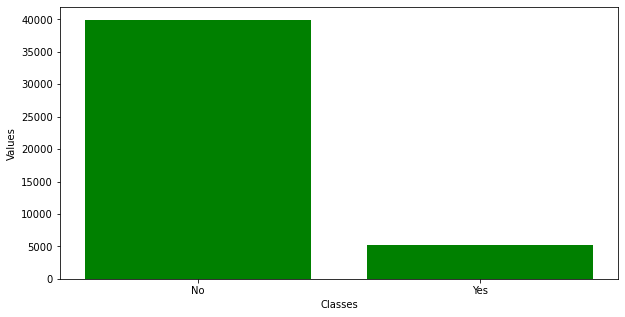

In [61]:
# importing matplotlib
import matplotlib.pyplot as plt

# plotting
fig = plt.figure(figsize = (10, 5))

#  Bar plot
plt.bar(['No',"Yes"], data.y.value_counts(), color ='green',
        width = 0.8)

# labeling
plt.xlabel("Classes")
plt.ylabel("Values")
plt.show()

In [62]:
# splitting dataset
X = data.drop('y', axis=1)
y = data['y']

In [63]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [84]:
# importing required module
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import Sequential

# define model
model = Sequential()

# adding input layer with 16 nodes
model.add(InputLayer(16))

# adding hidden layer with 10 nodes
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

# adding output layer 
model.add(Dense(1, activation='sigmoid'))



In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=50)



Epoch 1/50
989/989 [==============================] - 2s 2ms/step - loss: 5.0580 - accuracy: 0.8008
Epoch 2/50
989/989 [==============================] - 2s 2ms/step - loss: 1.2809 - accuracy: 0.8351
Epoch 3/50
989/989 [==============================] - 2s 2ms/step - loss: 1.0795 - accuracy: 0.8487
Epoch 4/50
989/989 [==============================] - 2s 2ms/step - loss: 1.1269 - accuracy: 0.8530
Epoch 5/50
989/989 [==============================] - 2s 2ms/step - loss: 1.0118 - accuracy: 0.8536
Epoch 6/50
989/989 [==============================] - 2s 2ms/step - loss: 0.7598 - accuracy: 0.8600
Epoch 7/50
989/989 [==============================] - 2s 2ms/step - loss: 0.7465 - accuracy: 0.8628
Epoch 8/50
989/989 [==============================] - 2s 2ms/step - loss: 1.0412 - accuracy: 0.8555
Epoch 9/50
989/989 [==============================] - 2s 2ms/step - loss: 0.9196 - accuracy: 0.8578
Epoch 10/50
989/989 [==============================] - 2s 2ms/step - loss: 0.9587 - accuracy: 0.8560

In [74]:
# making predictions
preds = model.predict(X_test)

424/424 [==============================] - 1s 1ms/step


In [83]:
# evaluate the model
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

424/424 [==============================] - 1s 2ms/step - loss: 0.3068 - accuracy: 0.8830
Test Accuracy: 0.8829991221427917
